# Tutorial: Classical Molecular Dynamics Simulations of the Bulk Water

By: Nitesh Kumar (nitesh.kumar@wsu.edu) Washington State University, Pullman. 

This tutorial will help a new user to set up a water box for classcial MD simulations and perform analysis on the output trajectory

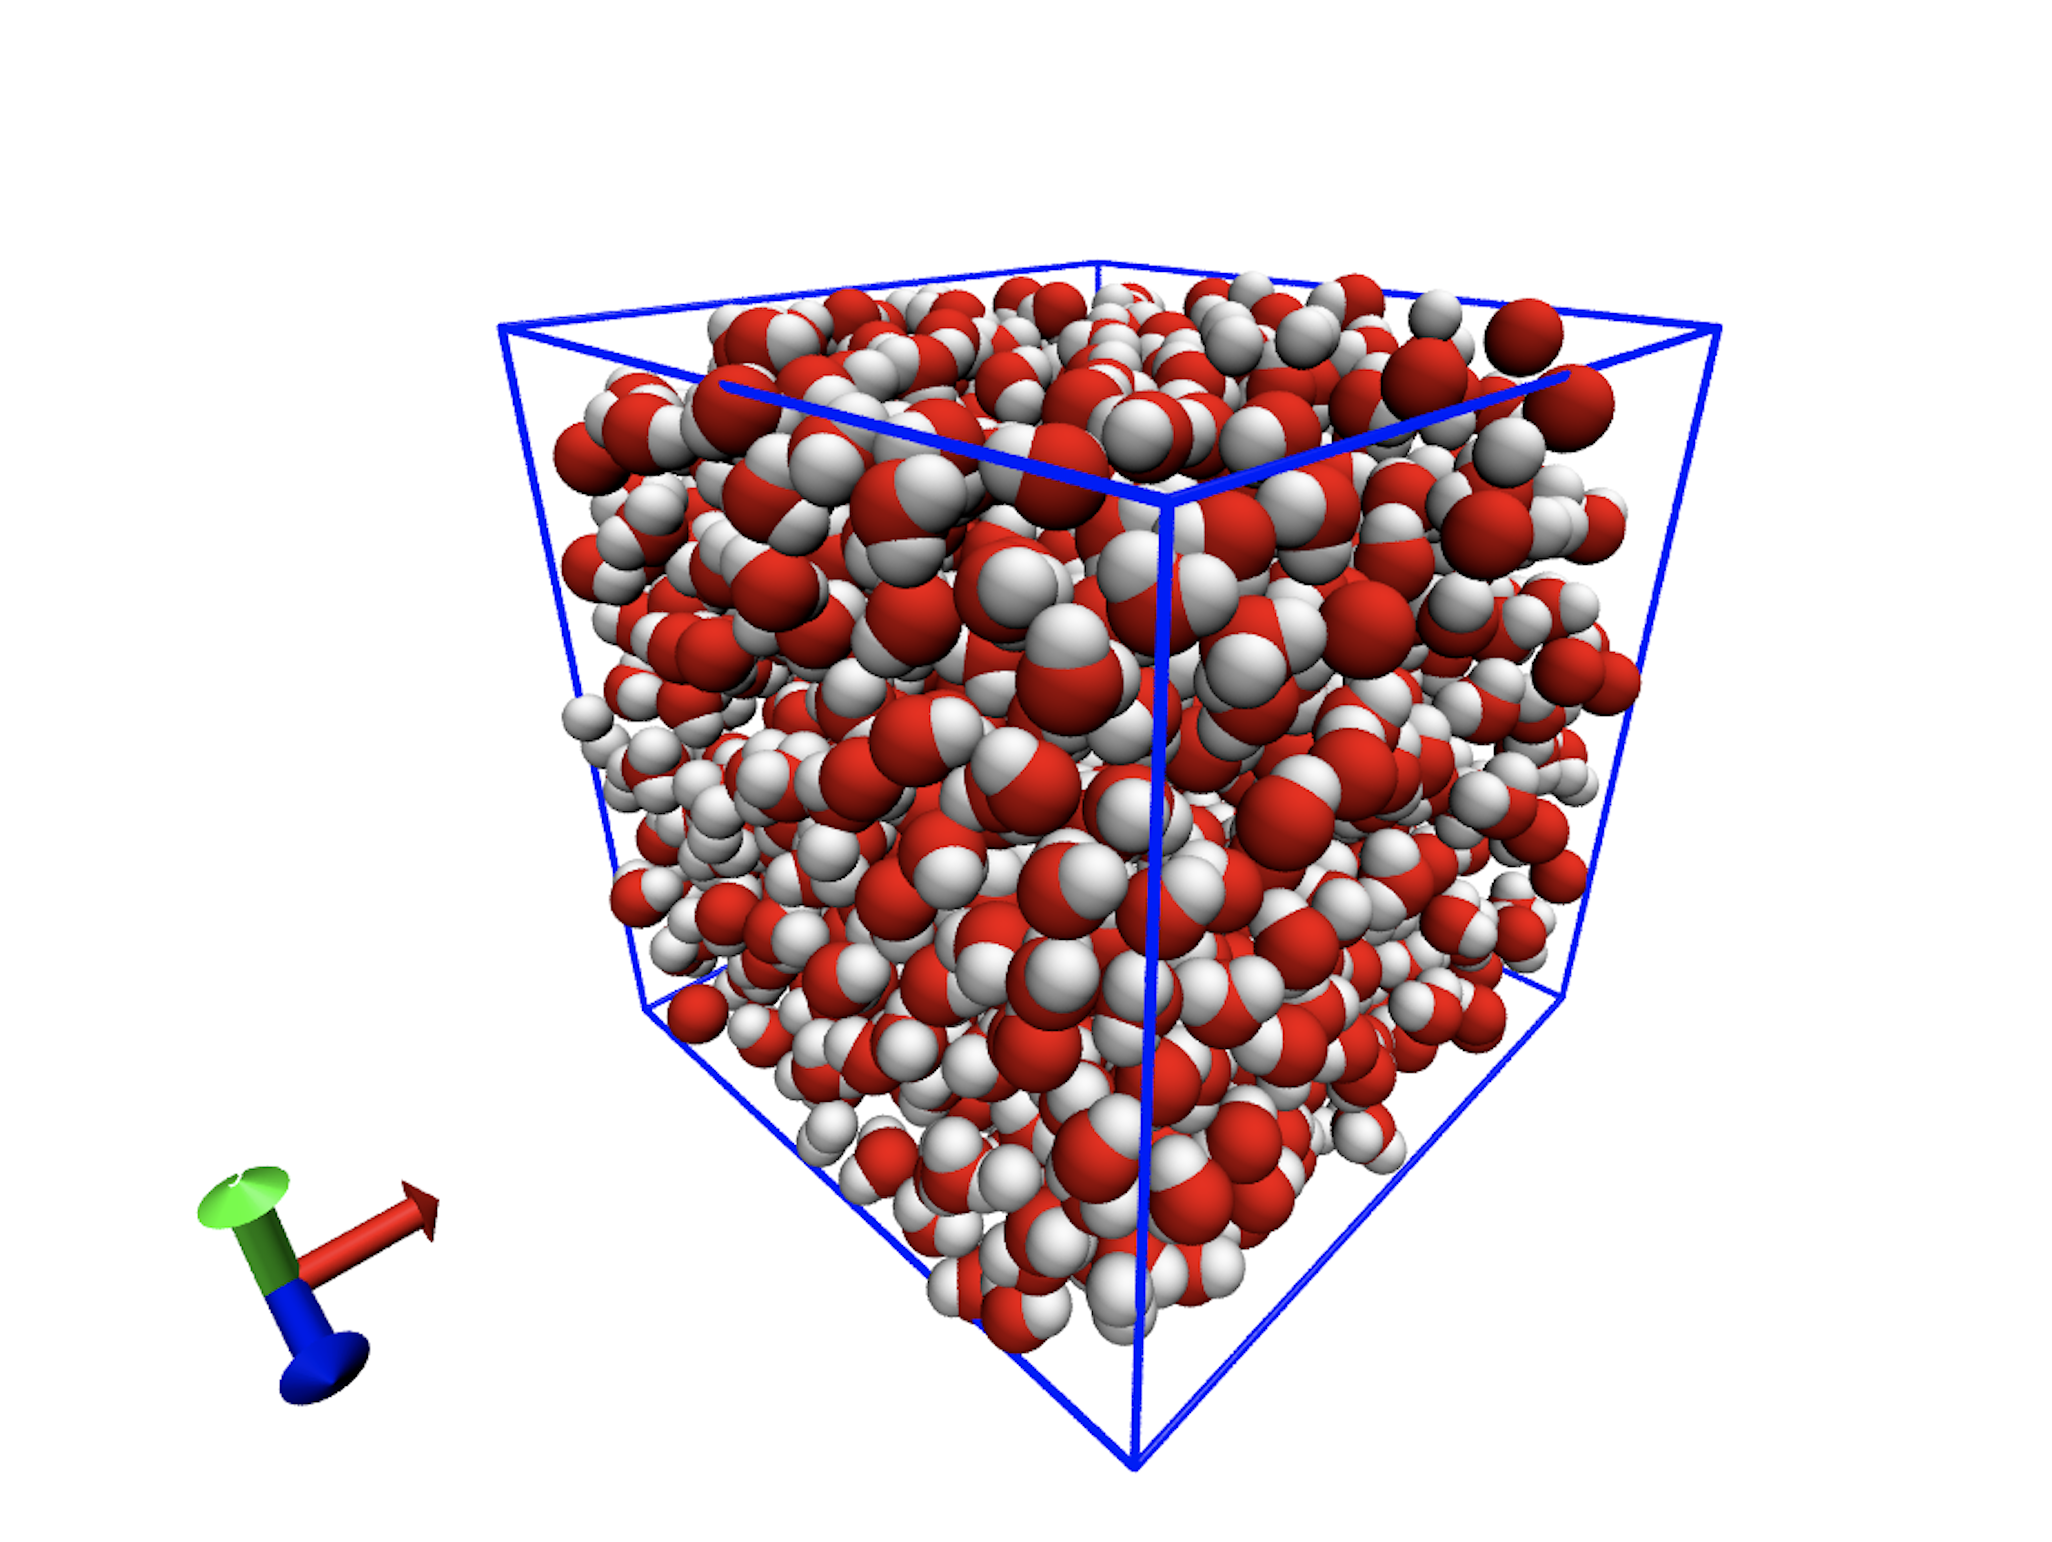

## Workflow of this tutorial ##
1. Generate the coordinates 
2. Create the topology 
3  Do the energy minimization 
4. Do the equilibration 
5. Run the production run 
6. Do the analysis

## Generate a water box coordinates using Packmol ## 

The content of the input file for packmol is described below : 

In [ ]:
!vi wat_box.inp

## The input file for the packmol is provided below

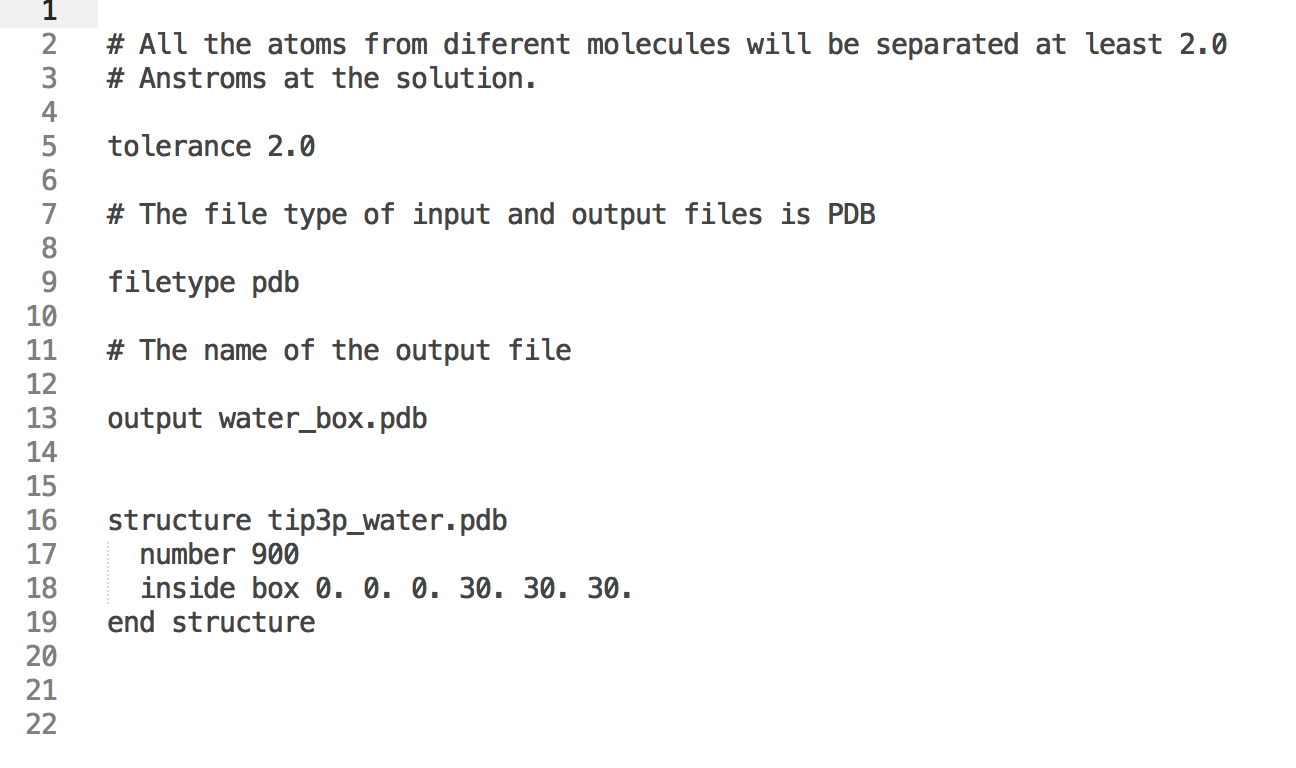

### now we can run this input file using the command 

In [2]:
!packmol < wat_box.inp


################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 20.010 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: http://m3g.iqm.unicamp.br/packmol 

  Reading input file... (Control-C aborts)
  Seed for random number generator:      1234567
  Output file: water_box.pdb
  Reading coordinate file: tip3p_water.pdb
  Number of independent structures:            1
  The structures are: 
  Structure            1 :tip3p_water.pdb(           3  atoms)
  Maximum number of GENCAN loops for all molecule packing:          200
  Total number of restrictions:            1
  Distance tolerance:    2.0000000000000000     
  Residue numbering set for structure            1 :      

In [3]:
!ls -ltr 

total 45256
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

### This will output water_box.pdb file ## 
### We can convert the pdb file to gro file using the command below 


In [4]:
!gmx editconf -f water_box.pdb -o start_box.gro 

               :-) GROMACS - gmx editconf, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx editconf -f water_box.pdb -o start_box.gro

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 2700 atoms
No velocities found

See the GROMACS manual for a description of the requirements that
must be satisfied by descriptions of simulation cells.

Back Off! I just backed up start_box.gro to ./#start_box.gro.1#

GROMACS reminds you: "After a few talks we usually sit down to do some work... or drinking." (Mike Klein)



In [5]:
!ls -ltr 

total 45504
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

Now go to the last line of the start_box.gro file and add the X Y and Z lengths in nm. 

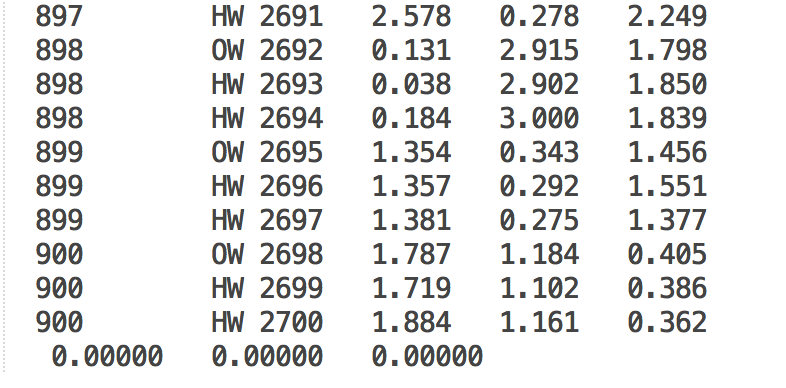

## In this case, change the last line to 3.0 3.0 3.0, since the box is cubic with length 3 nm.


Question: What values to expect for rectangular box ? 

## Now we have the simulation cell, next step is to generate force fields ##

A simple way to create force fields using GROMACS is to use gmx pdb2gmx command 

In [6]:
!gmx pdb2gmx -f water_box.pdb -o start.gro -water tip3p 

               :-) GROMACS - gmx pdb2gmx, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx pdb2gmx -f water_box.pdb -o start.gro -water tip3p

Select the Force Field:

From '/Users/user1/opt/miniconda3/share/gromacs/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS force field (Garcia & 

In [37]:
#!echo "3" | gmx pdb2gmx -f water_box.pdb -o start.gro -water spce

In [28]:
!ls -ltr 

total 6128
-rw-r-----  1 user1  staff   54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff  131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff  133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff  131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff     538 Nov  7 12:35 new_runscript.dms
-rw-r--r--  1 user1  staff   11997 Nov  7 12:35 mdout.mdp
-rw-r-----  1 user1  staff  973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff   63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff  133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff  186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff   42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff  131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   64964 Nov  7 12:35 minim.trr
-rw-r-----  1 user1  staff  133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff   17741 Nov  7 12:35 minim.log
-rw-r-----  1 user1  staff  121541 Nov  7 12

## Topology of the system 

In GROMACS, we need individual topology files for each molecule, these are called the ".itp" files. 
All of these files are mentioned in the ".top" file. 
The top file in combination with the gro and mdp files is used to generate a ".tpr" file. 
The tpr file is used to run the simulation. 


Lets start with the itp file:

In this system we have only water, so we need one itp file that is tip3p.itp 
Lets see what is inside this file, and understand it step by step.

## tip3p.itp ##

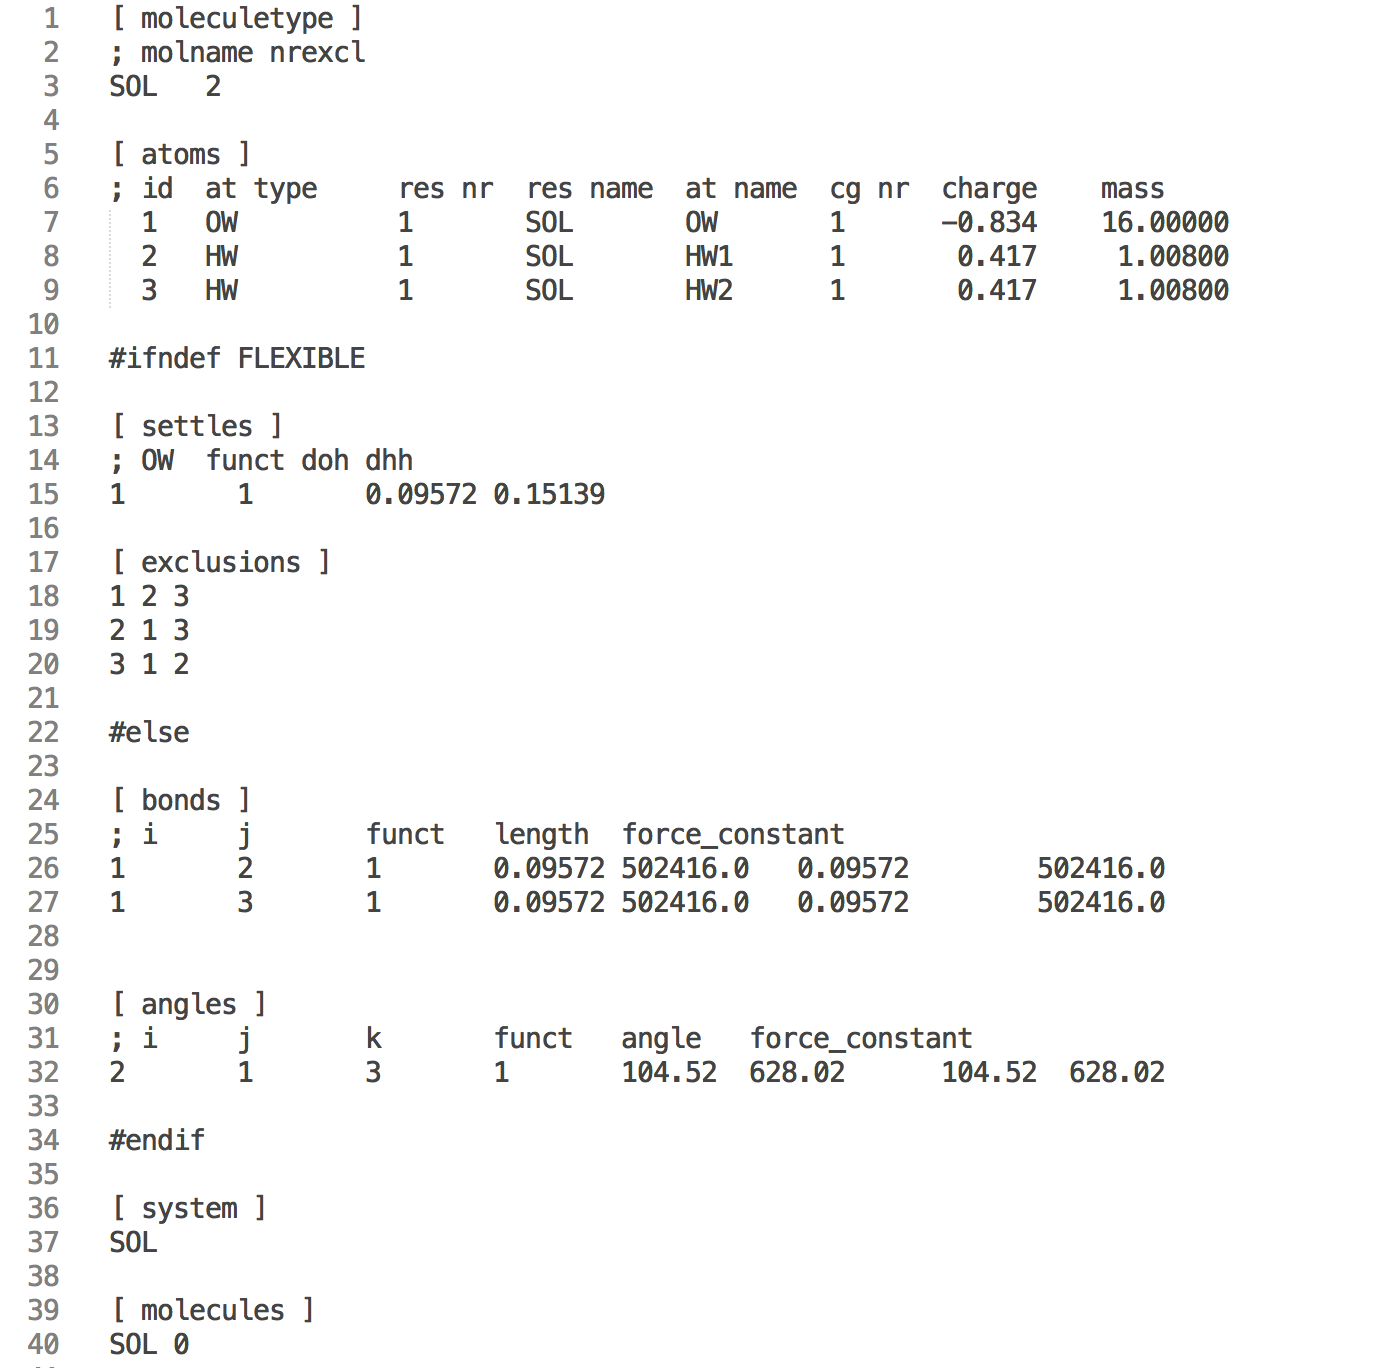

In case you want to use constraint on the water molecule, you can fix the distances using the SHAKE command, specifically for water. SETTLE can be selected in the topology file. 

The settle funct is always 1, and the distance between O-H and H-H distances must be given. Note that the algorithm can also be used for TIP3P and TIP4P. TIP3P just has another geometry.

Now we need to include this itp file to the .top file. Lets understand .top file for this system 

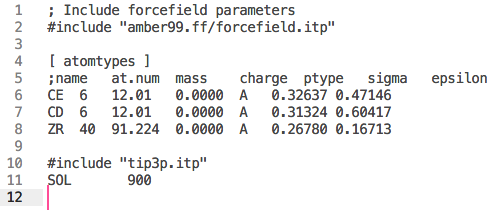

## Now we have the coordinates and the topology we can now define the simulation run parameters within the mdp file 

A typical mdp file for the NPT ensemble is provided below, this file mostly remains the same, you can tune it if you want to run longer simulations 

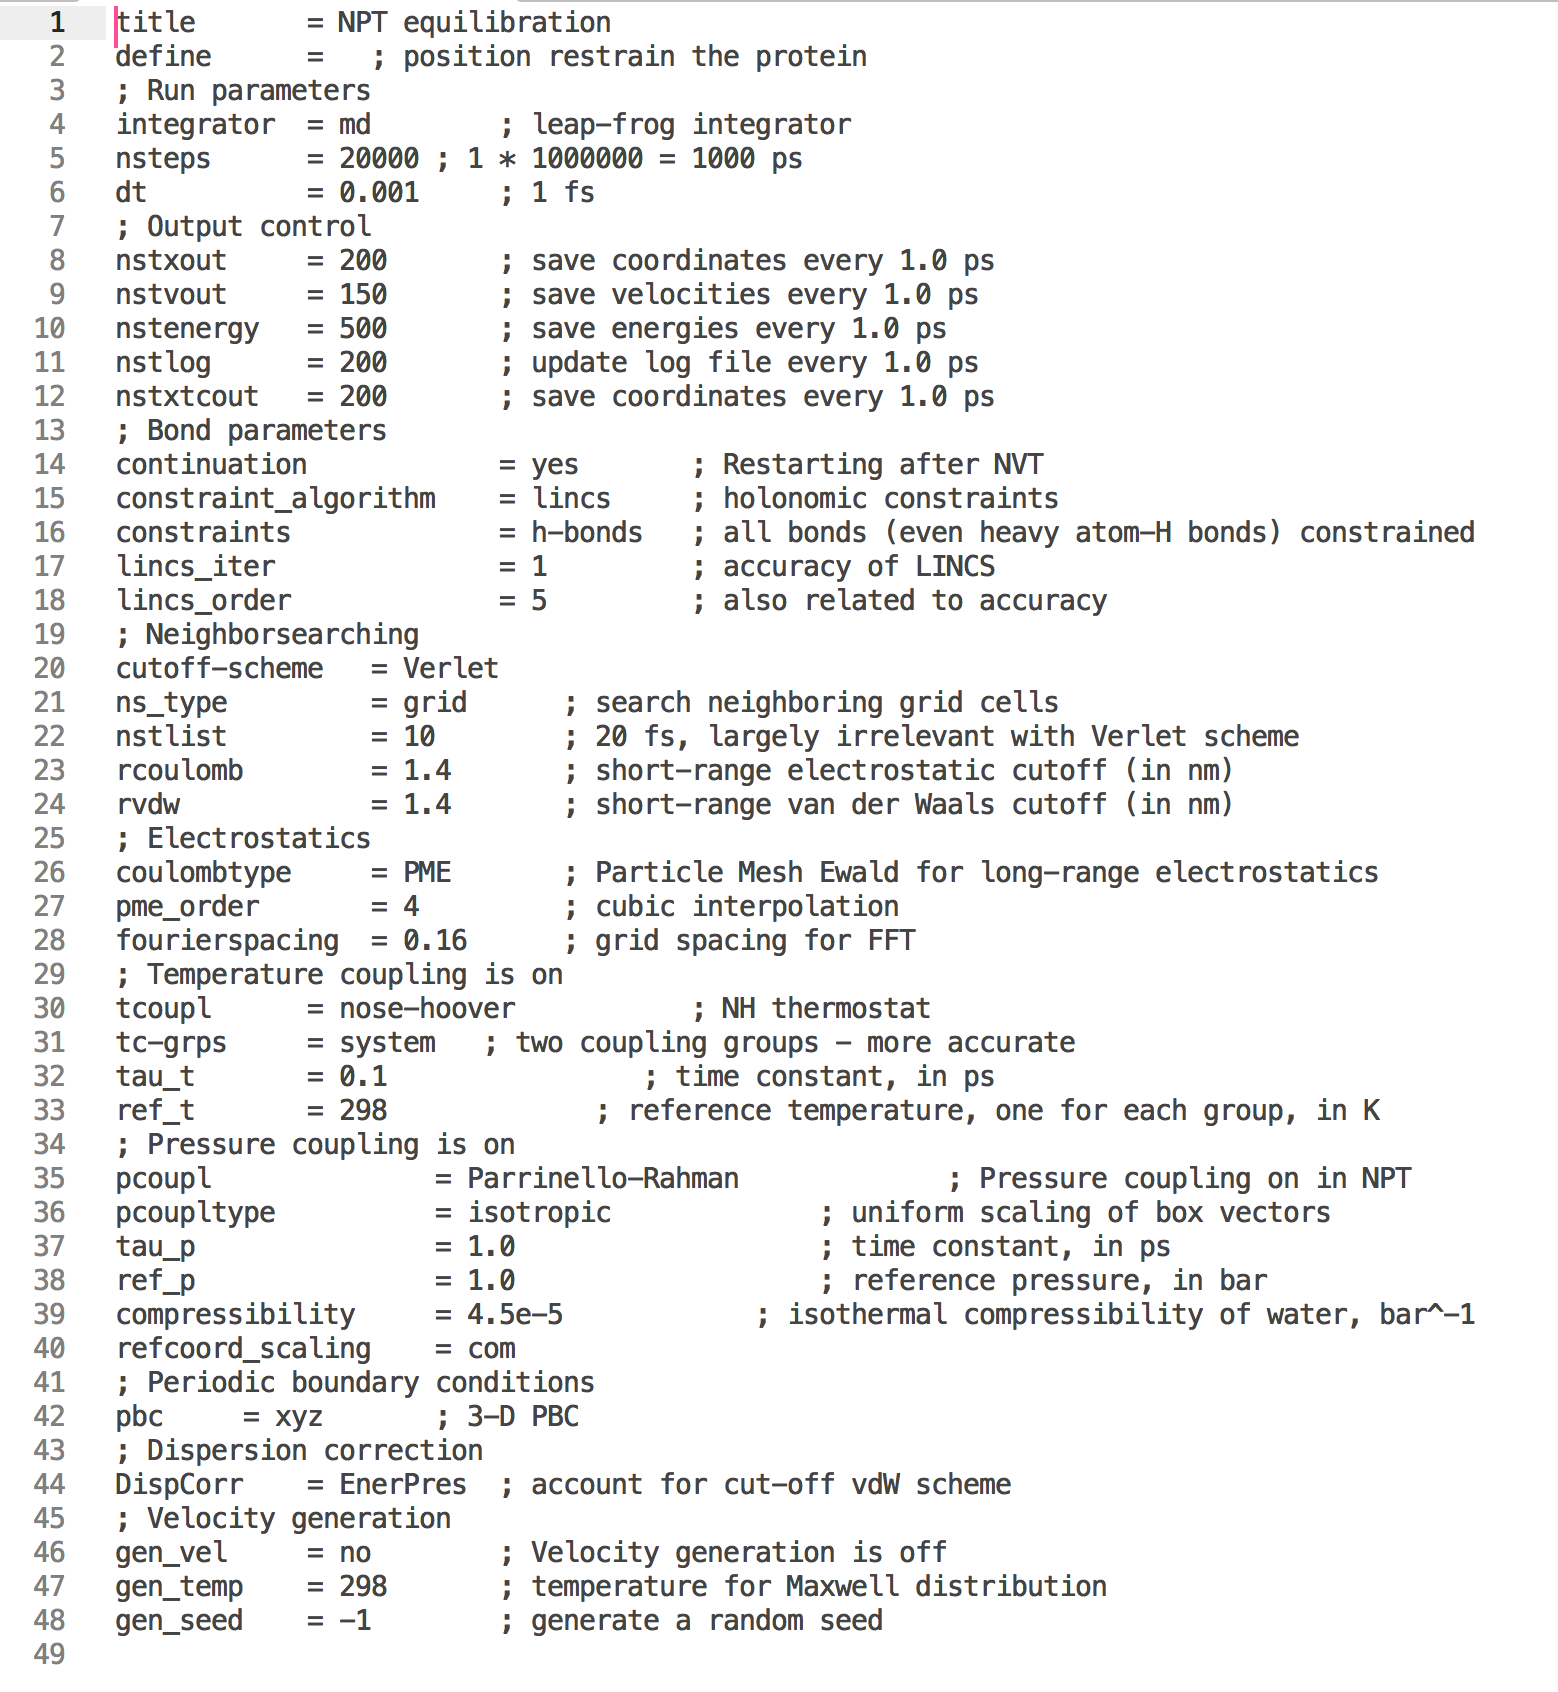

## Now we have 
1. coordinate file : .gro file 
2. topology files : .itp and .top file 
3. molecular dynamics parameter file : .mdp file 
4. we can use these files to generate the .top file using the following command     

## First of all we need to minimize the energy of the system ##

In [7]:
!gmx grompp -f minim.mdp -c start.gro -p topol.top -o minim.tpr -maxwarn 10 

                :-) GROMACS - gmx grompp, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx grompp -f minim.mdp -c start.gro -p topol.top -o minim.tpr -maxwarn 10

Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -569918307

Generated 2346 of the 2346 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2346 of the 2346 1-4 parameter combinations

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 2 bonded neighbours molecule type 'SOL'


#### the minim.mdp file described here is slightly different than all other mdp files. Lets see what is looks like and understand its content 

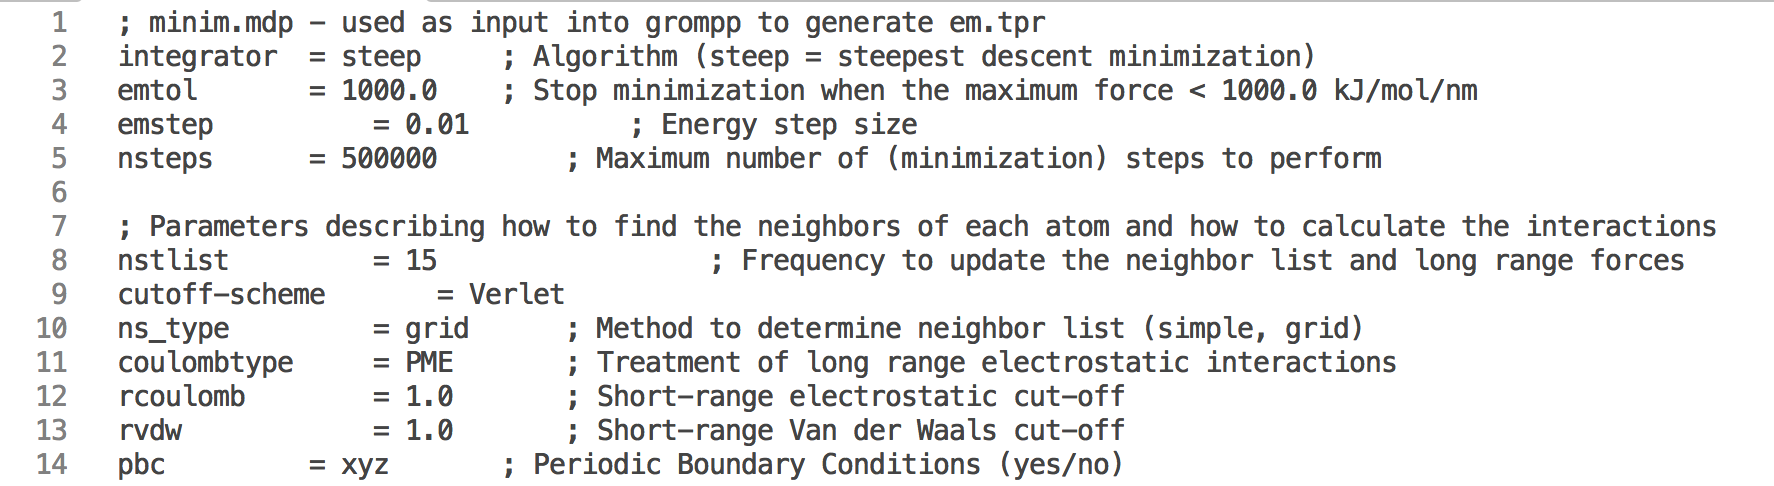

### Now run the energy minimzation using the following command 

In [8]:
!gmx mdrun -deffnm minim 

                :-) GROMACS - gmx mdrun, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx mdrun -deffnm minim


Back Off! I just backed up minim.log to ./#minim.log.2#
Reading file minim.tpr, VERSION 2016.2 (double precision)
Note: file tpx version 110, software tpx version 127
Using 1 MPI thread
Using 4 OpenMP threads 


Back Off! I just backed up minim.trr to ./#minim.trr.2#

Back Off! I just backed up minim.edr to ./#minim.edr.2#

Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =       500000

step 11: One or more water molecules can not be settled.
Check for bad contacts and/or reduce the timestep if appropriate.

Back Off! I just backed up step11b.pdb to ./#step11b.pdb.1#

Back Off! I just backed up step11c.pdb to ./#step11c.pdb.

In [9]:
!ls -ltr 

total 47552
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

#### let check the system minimzation using potential energy ##

In [10]:
!gmx energy -f minim.edr -o pe_energy 

                :-) GROMACS - gmx energy, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx energy -f minim.edr -o pe_energy

Opened minim.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  LJ-(SR)          2  Coulomb-(SR)     3  Coul.-recip.     4  Potential     
  5  Pressure         6  Vir-XX           7  Vir-XY           8  Vir-XZ        
  9  Vir-YX          10  Vir-YY          11  Vir-YZ          12  Vir-ZX        
 13  Vir-ZY          14  Vir-ZZ          15  Pres-XX         16  Pres-XY       
 17  Pres-XZ         18  Pres-YX         

In [11]:
!echo "4" | gmx energy -f minim.edr -o pe_energy 

                :-) GROMACS - gmx energy, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx energy -f minim.edr -o pe_energy

Opened minim.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  LJ-(SR)          2  Coulomb-(SR)     3  Coul.-recip.     4  Potential     
  5  Pressure         6  Vir-XX           7  Vir-XY           8  Vir-XZ        
  9  Vir-YX          10  Vir-YY          11  Vir-YZ          12  Vir-ZX        
 13  Vir-ZY          14  Vir-ZZ          15  Pres-XX         16  Pres-XY       
 17  Pres-XZ         18  Pres-YX         

In [12]:
!ls -ltr 

total 47568
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

## lets plot the PE vs time for the minimization step ##

In [13]:
inputfile_300K = 'pe_energy.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

<Figure size 640x480 with 0 Axes>

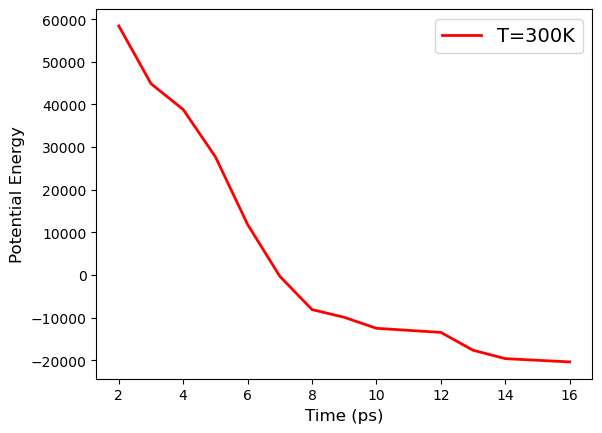

In [15]:
import matplotlib.pyplot as plt
import os
#import MDAnalysis
import numpy as np
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from math  import sqrt
from matplotlib import cm

# matplotlib settings for LaTeX
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.clf()
fig, ax = plt.subplots()


plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=2.0)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel(r'Time (ps)', fontsize=12)
plt.ylabel(r'Potential Energy', fontsize=12)
plt.show()
#plt.ylim(2, 23)
#plt.xlim(230, 350)
#plt.savefig('density_Converge_Temp.pdf', bbox_inches='tight', dpi=1200)

## After minimzation we should do the equilibration in the NPT to make sure the density of the system is converged ## 

In [4]:
!gmx grompp -f npt_298_nh_pr.mdp -c minim.gro -p topol.top -o npt_equilibration -maxwarn 10

                :-) GROMACS - gmx grompp, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx grompp -f npt_298_nh_pr.mdp -c minim.gro -p topol.top -o npt_equilibration -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Replacing old mdp entry 'nstxtcout' by 'nstxout-compressed'

NOTE 1 [file npt_298_nh_pr.mdp]:
  leapfrog does not yet support Nose-Hoover chains, nhchainlength reset to 1

Setting the LD random seed to -605304833

Generated 2346 of the 2346 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2346 of the 2346 1-4 parameter combinations

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'


In [16]:
!gmx mdrun -deffnm npt_equilibration

                :-) GROMACS - gmx mdrun, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx mdrun -deffnm npt_equilibration


Back Off! I just backed up npt_equilibration.log to ./#npt_equilibration.log.1#
Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Note: file tpx version 110, software tpx version 127
Changing nstlist from 10 to 100, rlist from 1.4 to 1.486

Using 1 MPI thread
Using 4 OpenMP threads 


Back Off! I just backed up npt_equilibration.xtc to ./#npt_equilibration.xtc.1#

Back Off! I just backed up npt_equilibration.trr to ./#npt_equilibration.trr.1#

Back Off! I just backed up npt_equilibration.edr to ./#npt_equilibration.edr.1#
starting mdrun 'SOL'
20000 steps,     20.0 ps.
^C


Received the INT signal, stopping within 100 steps

### Now simulation is finished, we can check the output ##

In [17]:
!ls -ltr 

total 49128
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

## Analysis of the GROMACS trajectory ##

### Check the temperature ## 

In [18]:
!gmx energy -f npt_equilibration.edr -o temperature 

                :-) GROMACS - gmx energy, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx energy -f npt_equilibration.edr -o temperature

Opened npt_equilibration.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  LJ-(SR)          2  Disper.-corr.    3  Coulomb-(SR)     4  Coul.-recip.  
  5  Potential        6  Kinetic-En.      7  Total-Energy     8  Conserved-En. 
  9  Temperature     10  Pres.-DC        11  Pressure        12  Box-X         
 13  Box-Y           14  Box-Z           15  Volume          16  Density       
 17  pV        

In [8]:
!echo "9" | gmx energy -f npt_equilibration.edr -o temperature 

                :-) GROMACS - gmx energy, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx energy -f npt_equilibration.edr -o temperature

Opened npt_equilibration.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  LJ-(SR)          2  Disper.-corr.    3  Coulomb-(SR)     4  Coul.-recip.  
  5  Potential        6  Kinetic-En.      7  Total-Energy     8  Conserved-En. 
  9  Temperature     10  Pres.-DC        11  Pressure        12  Box-X         
 13  Box-Y           14  Box-Z           15  Volume          16  Density       
 17  pV        

## Lets plot the temperature ##

In [19]:
inputfile_300K = 'temperature.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

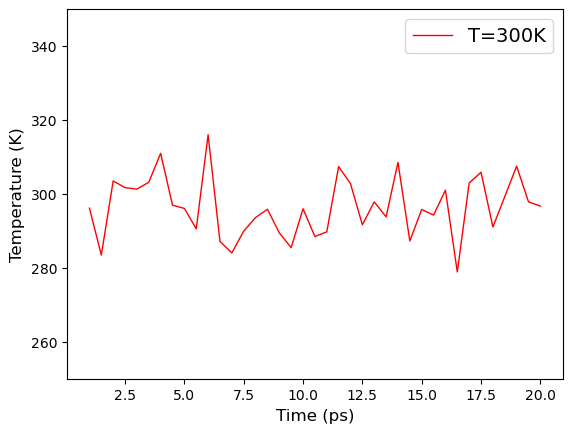

In [20]:
plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=1.0)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel(r'Time (ps)', fontsize=12)
plt.ylim(250,350)
plt.ylabel(r'Temperature (K)', fontsize=12)
plt.show()

## Note that it is a good habit to equilibrate the system in both NPT and NVT before production runs, for this tutorial purpose i am skipping the NVT equilibration step for you. 

## Now lets check the pressure of the system ##

In [19]:
!echo "11" | gmx energy -f npt_equilibration.edr -o pressure 

                :-) GROMACS - gmx energy, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx energy -f npt_equilibration.edr -o pressure

Opened npt_equilibration.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  LJ-(SR)          2  Disper.-corr.    3  Coulomb-(SR)     4  Coul.-recip.  
  5  Potential        6  Kinetic-En.      7  Total-Energy     8  Conserved-En. 
  9  Temperature     10  Pres.-DC        11  Pressure        12  Box-X         
 13  Box-Y           14  Box-Z           15  Volume          16  Density       
 17  pV           

## plot the pressure ##

In [21]:
inputfile_300K = 'pressure.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

Text(0, 0.5, 'Pressure (bar)')

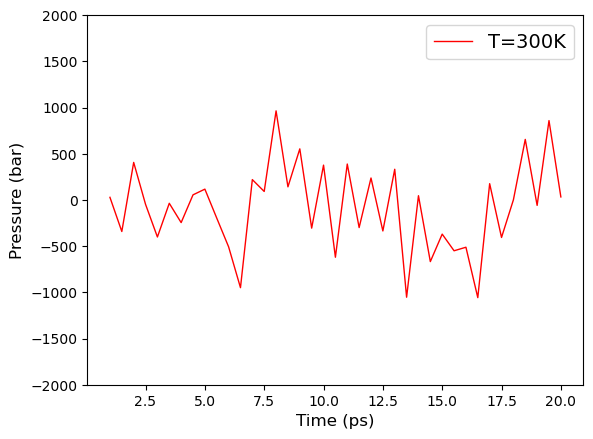

In [22]:
plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=1.0)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel(r'Time (ps)', fontsize=12)
plt.ylim(-2000,2000)
plt.ylabel(r'Pressure (bar)', fontsize=12)

## create pair correlation function between OW - OW atoms ##

To do so we need to first create an index file 

In [24]:
!gmx make_ndx -f npt_equilibration.tpr -o index.ndx 

               :-) GROMACS - gmx make_ndx, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx make_ndx -f npt_equilibration.tpr -o index.ndx


Reading structure file
Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:   900      Water residues

  0 System              :  2700 atoms
  1 Water               :  2700 atoms
  2 SOL                 :  2700 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              're

In [33]:
!echo "a OW" | gmx make_ndx -f minim.tpr -o index.ndx 

               :-) GROMACS - gmx make_ndx, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx make_ndx -f minim.tpr -o index.ndx


Reading structure file
Reading file minim.tpr, VERSION 2016.2 (double precision)
Reading file minim.tpr, VERSION 2016.2 (double precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:   900      Water residues

  0 System              :  2700 atoms
  1 Water               :  2700 atoms
  2 SOL                 :  2700 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              'res' nr         'chain' char
 "name": 

## Compute the RDF ##

In [43]:
!gmx rdf -f npt_equilibration.xtc -s npt_equilibration.tpr -o rdf_ow_ow -cn cn_ow_ow -n index.ndx -sel 3 -ref 3

                 :-) GROMACS - gmx rdf, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx rdf -f npt_equilibration.xtc -s npt_equilibration.tpr -o rdf_ow_ow -cn cn_ow_ow -n index.ndx -sel 3 -ref 3

Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Last frame        100 time   20.000   
Analyzed 101 frames, last time 20.000

GROMACS reminds you: "Put Me Inside SSC, Let's Test Superstring Theory, Oh Yoi Yoi Accelerate the Protons" (Gogol Bordello)



In [44]:
!ls -ltr 

total 45064
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

In [ ]:
## lets plot the rdf 

In [23]:
inputfile_300K = 'rdf_ow_ow.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

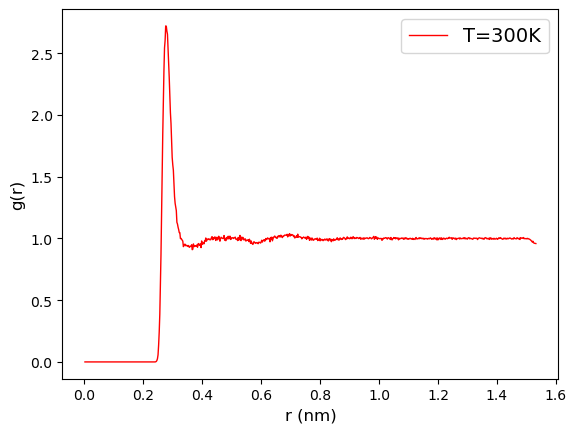

In [24]:
plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=1.0)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel(r'r (nm)', fontsize=12)
#plt.ylim(-2000,2000)
plt.ylabel(r'g(r)', fontsize=12)
plt.show()

In [ ]:
## lets plot the CN plot ##

In [25]:
inputfile_300K = 'cn_ow_ow.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

Text(0, 0.5, 'n(r)')

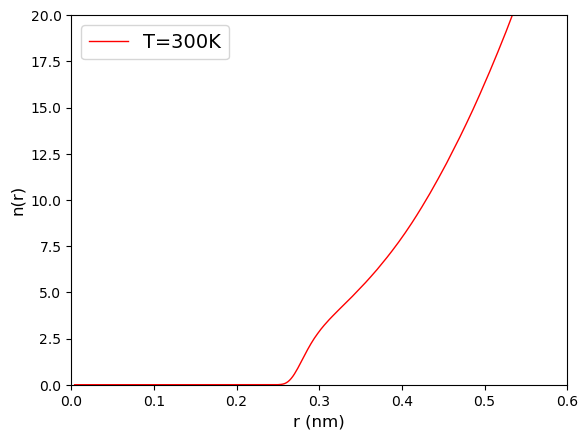

In [26]:
plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=1.0)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel(r'r (nm)', fontsize=12)
plt.ylim(0,20)
plt.xlim(0,0.6)
plt.ylabel(r'n(r)', fontsize=12)

In [ ]:
## lets compute the diffusion of water ## 

In [66]:
!gmx rms -f npt_equilibration.trr -s npt_equilibration.tpr -n index.ndx -o msd_water

                 :-) GROMACS - gmx rms, 2022.1-conda_forge (-:

Executable:   /Users/user1/opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /Users/user1/opt/miniconda3
Working dir:  /Users/user1/Desktop/powerpoint_pres/Data_Analysis_Course_by_Nitesh_Kumar/introduction_to_gromacs/water_simulations
Command line:
  gmx rms -f npt_equilibration.trr -s npt_equilibration.tpr -n index.ndx -o msd_water

Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Reading file npt_equilibration.tpr, VERSION 2016.2 (double precision)
Select group for least squares fit
Group     0 (         System) has  2700 elements
Group     1 (          Water) has  2700 elements
Group     2 (            SOL) has  2700 elements
Group     3 (             OW) has   900 elements
Select a group: ^C


In [67]:
!ls -ltr 

total 45184
-rw-r-----  1 user1  staff    54246 Nov  4 11:49 slurm-47431556_1.out
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod_prev.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 nvt_water_prod.tpr
-rw-r-----  1 user1  staff   131064 Nov  7 12:35 nvt_water_prod.cpt
-rwxrwxrwx  1 user1  staff      538 Nov  7 12:35 new_runscript.dms
-rw-r-----  1 user1  staff   973252 Nov  7 12:35 npt_water.xtc
-rw-r-----  1 user1  staff    63782 Nov  7 12:35 npt_water.log
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_water.tpr
-rw-r-----  1 user1  staff   186341 Nov  7 12:35 npt_water.gro
-rw-r-----  1 user1  staff    42788 Nov  7 12:35 npt_water.edr
-rw-r-----  1 user1  staff   131700 Nov  7 12:35 npt_water.cpt
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 npt_equilibration.tpr
-rw-r-----  1 user1  staff    64964 Nov  7 12:35 #minim.trr.1#
-rw-r-----  1 user1  staff   133096 Nov  7 12:35 minim.tpr
-rw-r-----  1 user1  staff    17741 Nov  7 12:35 #minim.log.1#
-rw-r---

In [ ]:
## plets plot msd of water ##

In [68]:
inputfile_300K = 'msd_water.xvg'
infile_300K = open(inputfile_300K, 'r')
lines_300K =  infile_300K.readlines()
lengthfile_300K = len(lines_300K)
infile_300K.close()
Time = []
PE_Energy_300K = []
for i in range(26,lengthfile_300K):
    #if (lines[i].find('# Fix ') != -1):
    Time.append(float(lines_300K[i].split()[0]))
    PE_Energy_300K.append(float(lines_300K[i].split()[1]))

Text(0, 0.5, 'RMSD (nm)')

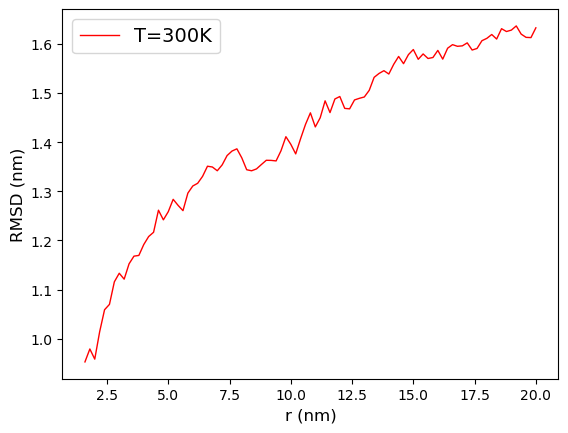

In [72]:
plt.plot(Time, PE_Energy_300K, label='T=300K', color='red', linewidth=1.0)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel(r'r (nm)', fontsize=12)
#plt.ylim(0,20)
#plt.xlim(0,0.6)
plt.ylabel(r'RMSD (nm)', fontsize=12)

## thank you for your attention ## 
## Questions ? 